In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#import lec4_graphs as gfx
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8,6)

In [5]:
df = pd.read_csv('qog_std_cs_jan18.csv')

(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <a list of 10 Patch objects>)

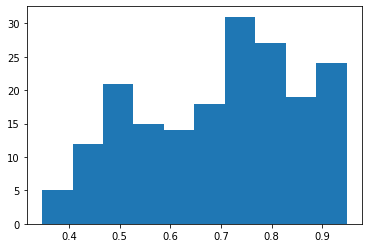

In [6]:
plt.hist(df['undp_hdi'].dropna())

Text(0.5, 1.0, 'Distribucion Empirica del IDH')

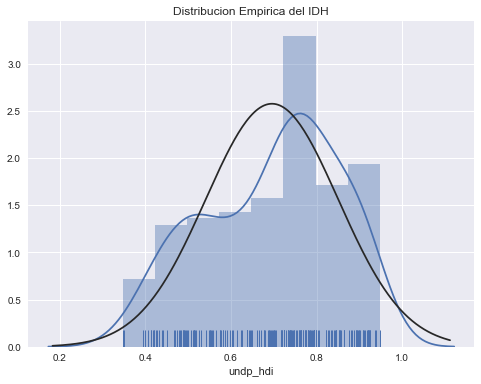

In [15]:
sns.distplot(df['undp_hdi'].dropna(),rug=True,fit=stats.norm)
plt.title('Distribucion Empirica del IDH')

In [16]:
df['region_recod'] = df['ht_region'].replace(
    [1,2,3,4,5,6,7,8,9,10],
    ['EastEurope','LatAm','NorthAfrica','SubSaharian','WesternDom','EastAsia','SouthEastAsia','SouthAsia','Pacific','Caribean']
)

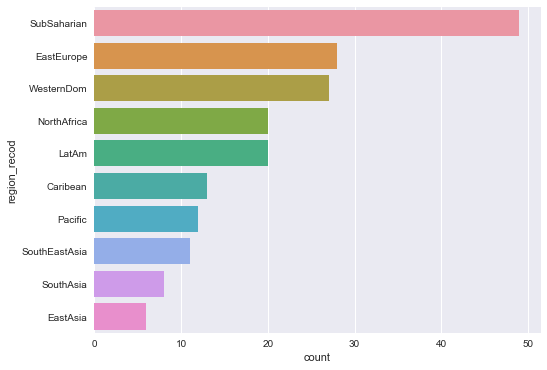

In [18]:
sns.countplot(y=df['region_recod'], order = df['region_recod'].value_counts().index)

In [19]:
df['demo'] = np.where(df['gol_inst'] <= 2 , 'Democracia','No Democracia')

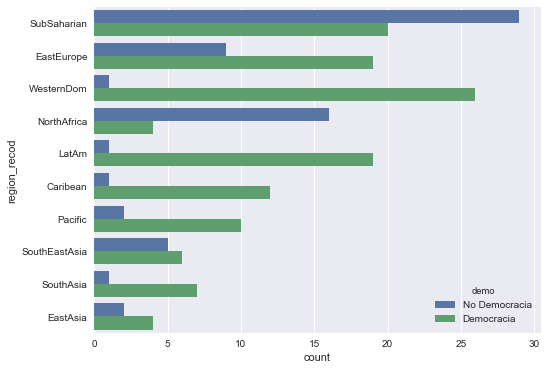

In [20]:
sns.countplot(y=df['region_recod'], hue=df['demo'] ,order = df['region_recod'].value_counts().index)

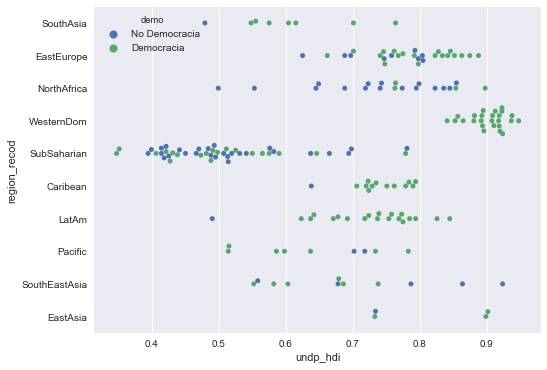

In [26]:
sns.swarmplot(y=df['region_recod'],
              x=df['undp_hdi'],
              hue=df['demo'])

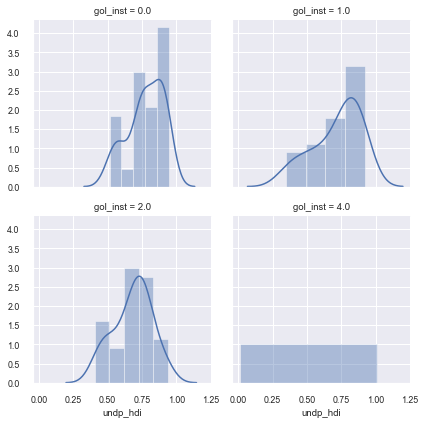

In [28]:
grid = sns.FacetGrid(df, col="gol_inst", col_wrap=2)
axes = grid.axes.flatten() # Obtener los ejes de ploteo para poder darle titulo a cada grafico
axes[0].set_title('gol_inst = 0.0')
axes[1].set_title('gol_inst = 1.0')
axes[2].set_title('gol_inst = 2.0')
axes[3].set_title('gol_inst = 4.0')
grid = grid.map(sns.distplot, "undp_hdi")

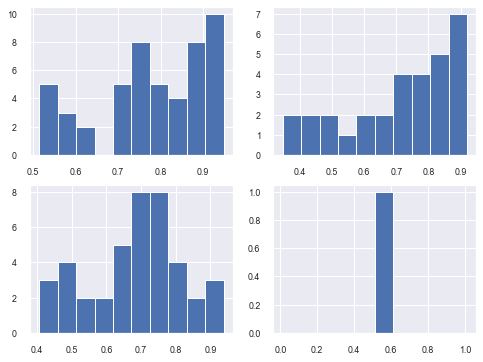

In [30]:
gol_0 = df[df['gol_inst'] == 0.0]['undp_hdi'].dropna()
gol_1 = df[df['gol_inst'] == 1.0]['undp_hdi'].dropna()
gol_2 = df[df['gol_inst'] == 2.0]['undp_hdi'].dropna()
gol_4 = df[df['gol_inst'] == 4.0]['undp_hdi'].dropna()

for i,j in enumerate([gol_0,gol_1,gol_2,gol_4]):
    plt.subplot(2,2 ,i+1)
    plt.hist(j)

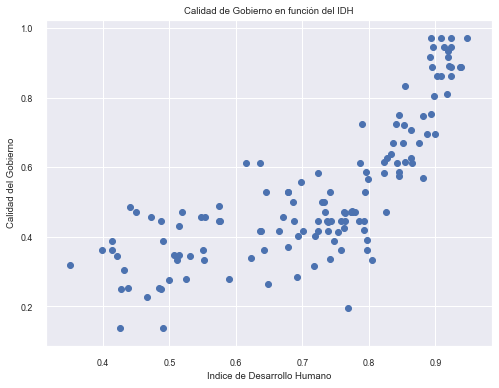

In [31]:
plt.scatter(x=df['undp_hdi'], y=df['icrg_qog'])
plt.title('Calidad de Gobierno en función del IDH')
plt.xlabel("Indice de Desarrollo Humano")
plt.ylabel("Calidad del Gobierno");

In [36]:
scatter_data = df.loc[:,['undp_hdi','icrg_qog','ccodealp']].dropna()

In [41]:
fig ,ax = plt.subplots()
ax.scatter(x=scatter_data['undp_hdi'],
          y=scatter_data['icrg_qog'],
          marker='.', s=1)

for i in scatter_data.index:
    ax.text(scatter_data.loc[i:'undp_hdi'],
           scatter_data.loc[i,'icrg_qog'],
           str(scatter_data.loc[i,'ccodealp']))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000019AFAA3F378> (for post_execute):


TypeError: float() argument must be a string or a number, not 'DataFrame'

TypeError: float() argument must be a string or a number, not 'DataFrame'

<Figure size 576x432 with 1 Axes>

In [42]:
pendiente , intercepto = np.polyfit(scatter_data['undp_hdi'],scatter_data['icrg_qog'],1)

In [43]:
print(pendiente)

1.0077917998503934


In [44]:
print(intercepto)

-0.1954107728917399


In [45]:
linear_fit = [pendiente * j + intercepto for j in scatter_data['undp_hdi']]

In [46]:
fig ,ax = plt.subplots()
ax.scatter(x=scatter_data['undp_hdi'],
          y=scatter_data['icrg_qog'],
          marker='.', s=1)
ax.plot(scatter_data['undp_hdi'], linear_fit)
for i in scatter_data.index:
    ax.text(scatter_data.loc[i:'undp_hdi'],
           scatter_data.loc[i,'icrg_qog'],
           str(scatter_data.loc[i,'ccodealp']))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000019AFAA3F378> (for post_execute):


TypeError: float() argument must be a string or a number, not 'DataFrame'

TypeError: float() argument must be a string or a number, not 'DataFrame'

<Figure size 576x432 with 1 Axes>

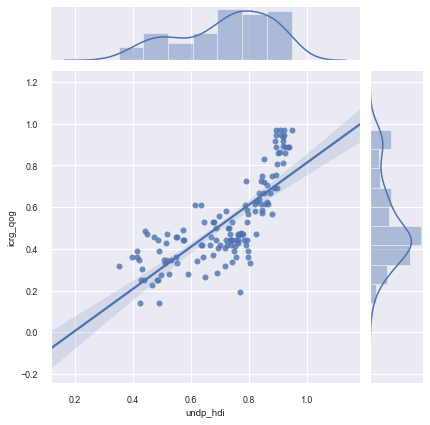

In [48]:
sns.jointplot(scatter_data['undp_hdi'],scatter_data['icrg_qog'], kind='reg')

In [51]:
scatter_data['undp_hdi'].corr(scatter_data['icrg_qog'])

0.7694078965882

In [54]:
wvs_subset = df.filter(regex='wvs_conf*').dropna()

In [56]:
wvs_subset.corr()

,wvs_confaf,wvs_confch,wvs_confcs,wvs_confenv,wvs_confgov,wvs_confjs,wvs_conflu,wvs_confpar,wvs_confpol,wvs_confpp,wvs_confpr,wvs_conftv,wvs_confun
wvs_confaf,1.000000,0.331289,0.632955,0.191708,0.539076,0.603475,0.429213,0.461554,0.495793,0.433317,0.380856,0.393870,0.253356
wvs_confch,0.331289,1.000000,0.128526,0.123436,0.098111,0.021361,0.145398,0.008904,-0.206500,0.071517,0.238694,0.298447,0.010541
wvs_confcs,0.632955,0.128526,1.000000,0.518017,0.771648,0.795691,0.872042,0.847592,0.593276,0.809296,0.733149,0.723421,0.595613
wvs_confenv,0.191708,0.123436,0.518017,1.000000,0.526552,0.415506,0.601539,0.594918,0.323091,0.584604,0.653851,0.578776,0.778747
wvs_confgov,0.539076,0.098111,0.771648,0.526552,1.000000,0.691203,0.741203,0.902106,0.526431,0.866313,0.723991,0.721074,0.514832
wvs_confjs,0.603475,0.021361,0.795691,0.415506,0.691203,1.000000,0.721389,0.693953,0.806605,0.606416,0.539229,0.545928,0.306461
wvs_conflu,0.429213,0.145398,0.872042,0.601539,0.741203,0.721389,1.000000,0.824853,0.497486,0.821691,0.847822,0.851007,0.610956
wvs_confpar,0.461554,0.008904,0.847592,0.594918,0.902106,0.693953,0.824853,1.000000,0.503028,0.963128,0.809282,0.789024,0.687792
wvs_confpol,0.495793,-0.206500,0.593276,0.323091,0.526431,0.806605,0.497486,0.503028,1.000000,0.379890,0.315123,0.304618,0.211052
wvs_confpp,0.433317,0.071517,0.809296,0.584604,0.866313,0.606416,0.821691,0.963128,0.379890,1.000000,0.816111,0.787537,0.716244


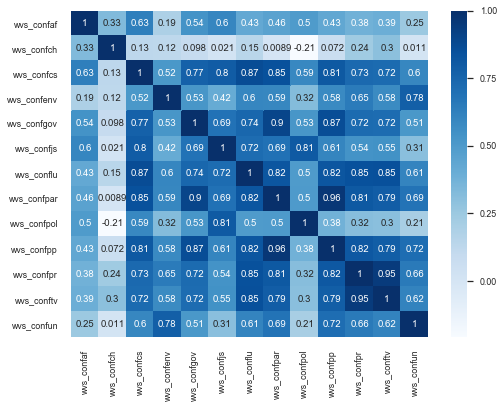

In [61]:
sns.heatmap(wvs_subset.corr(), cmap='Blues', annot=True)

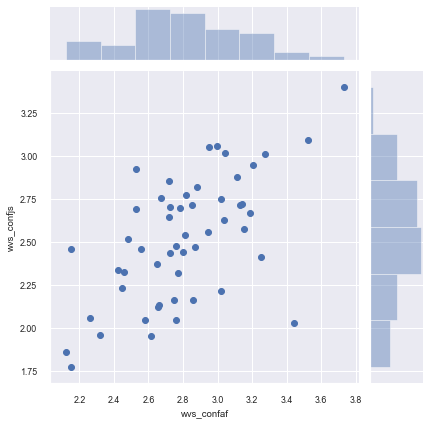

In [62]:
sns.jointplot(wvs_subset['wvs_confaf'], wvs_subset['wvs_confjs'])

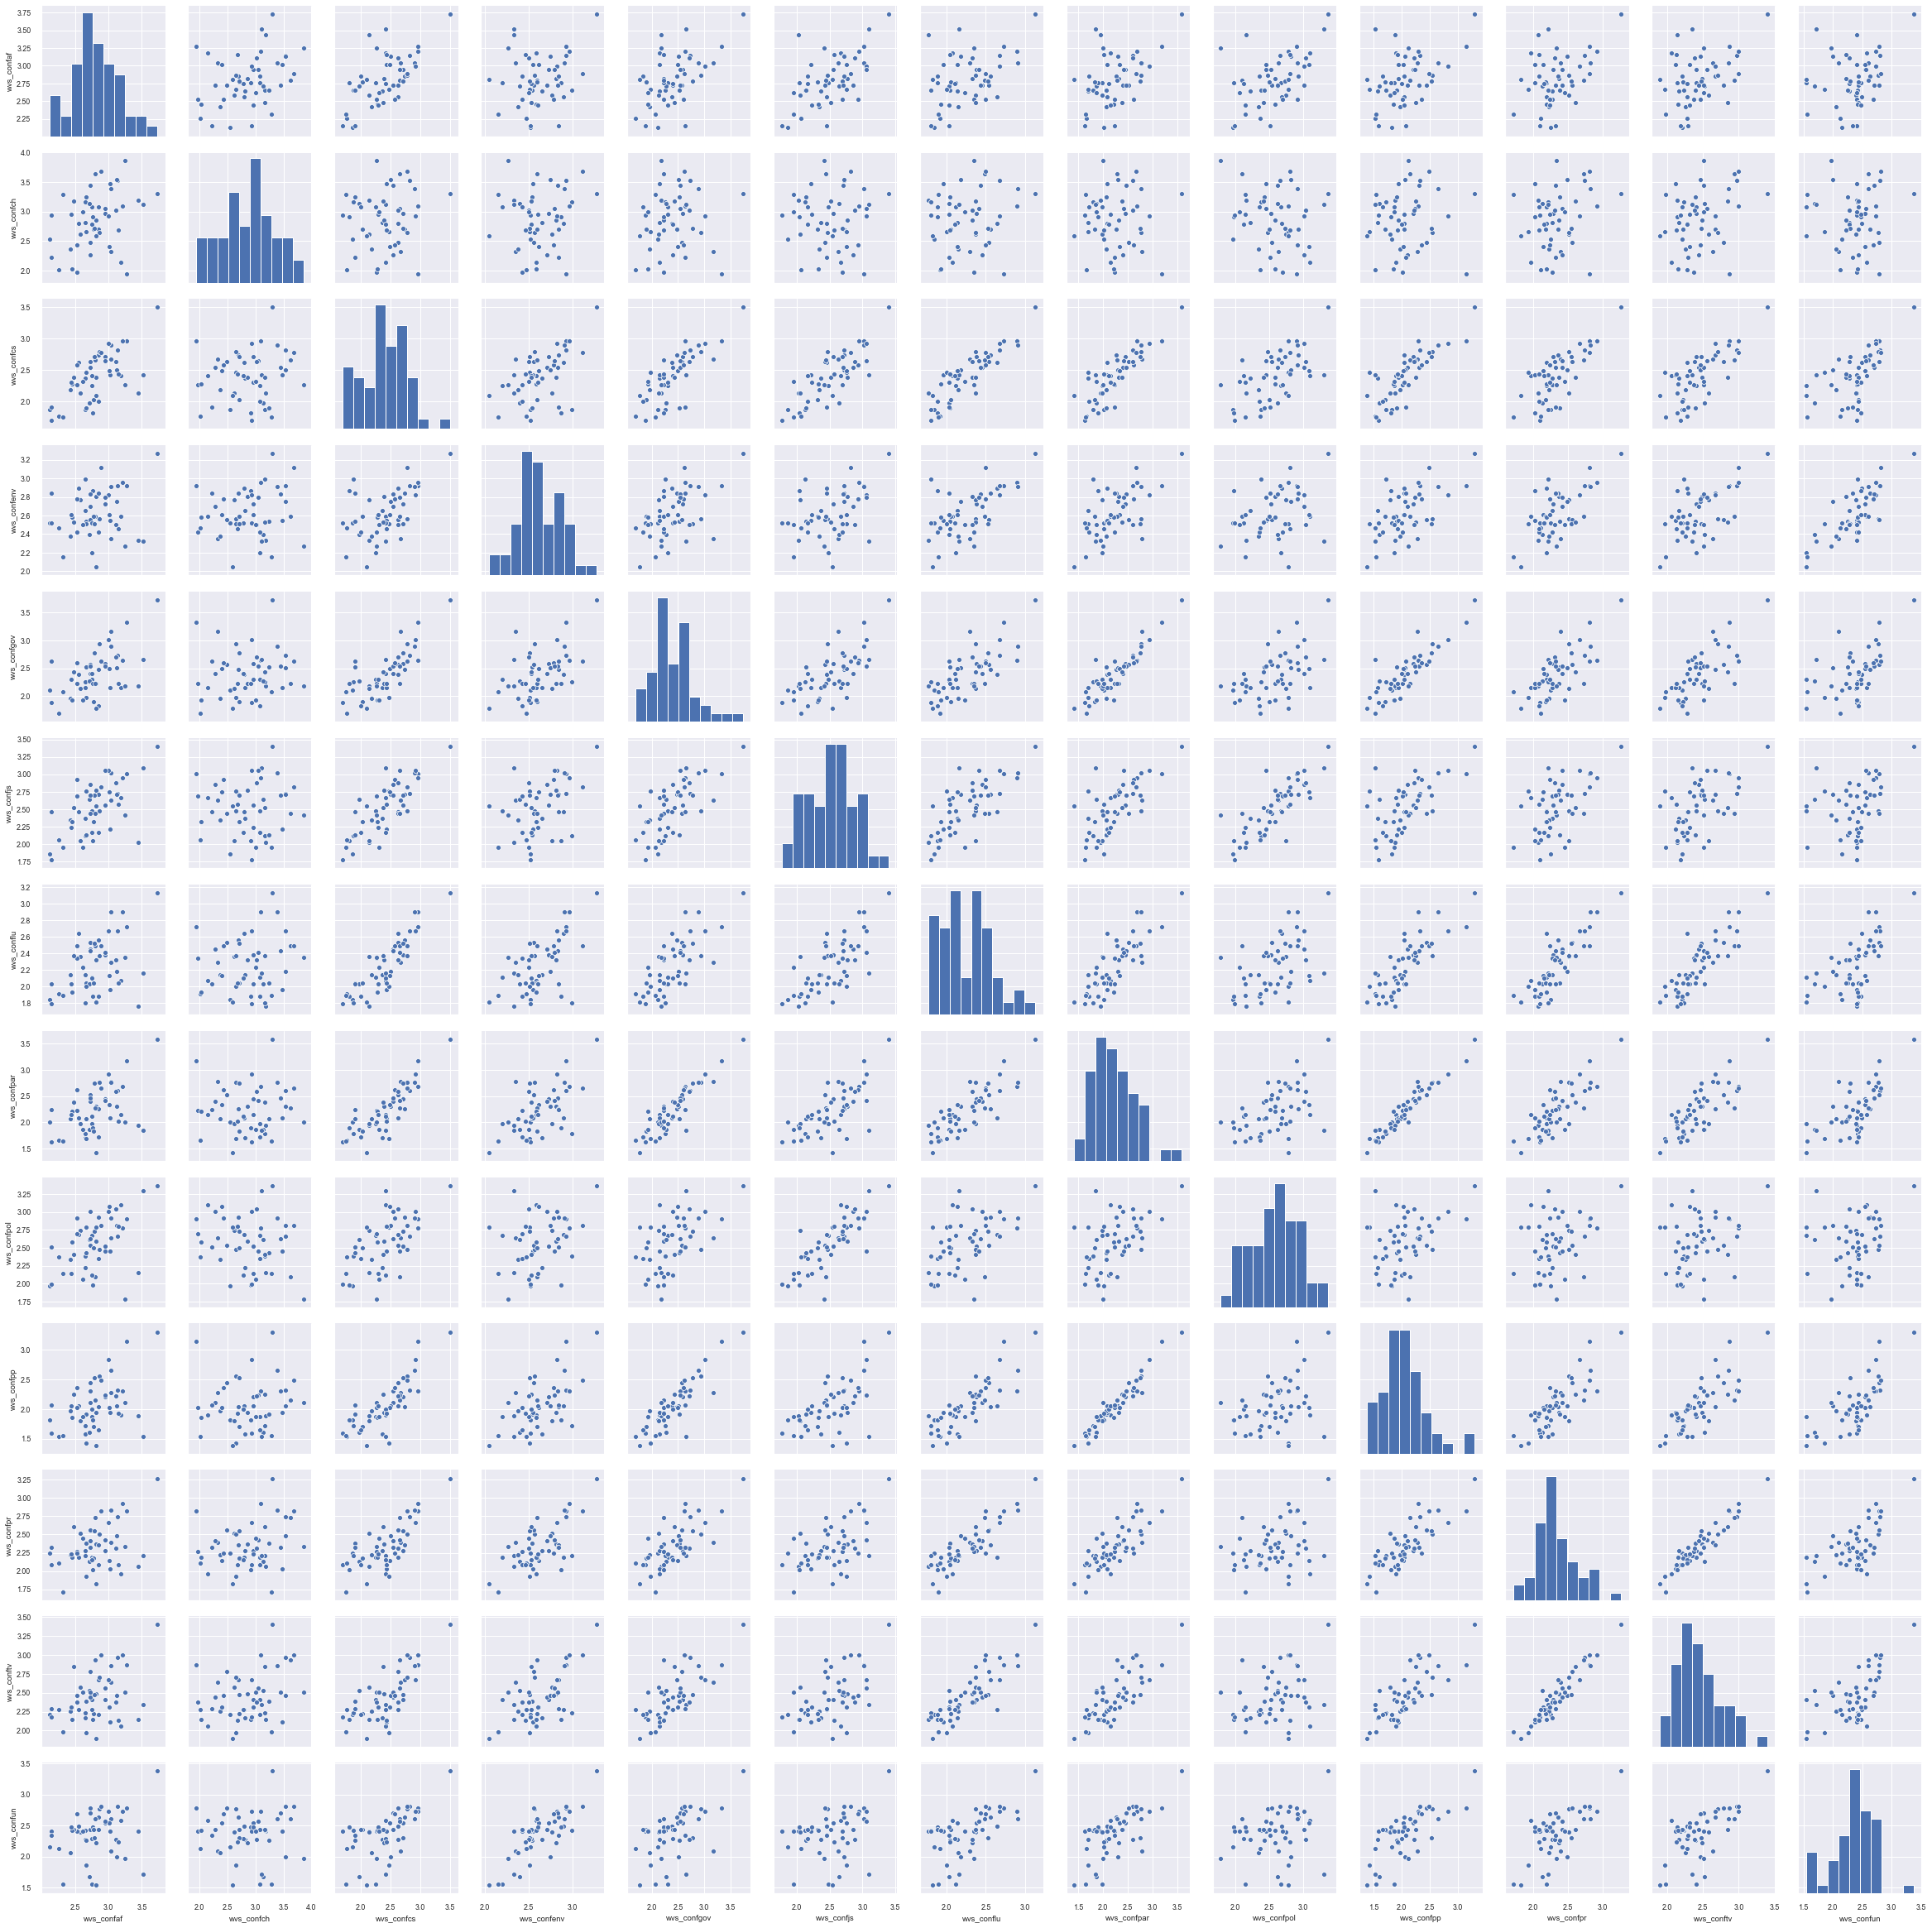

In [63]:
grid = sns.pairplot(wvs_subset)

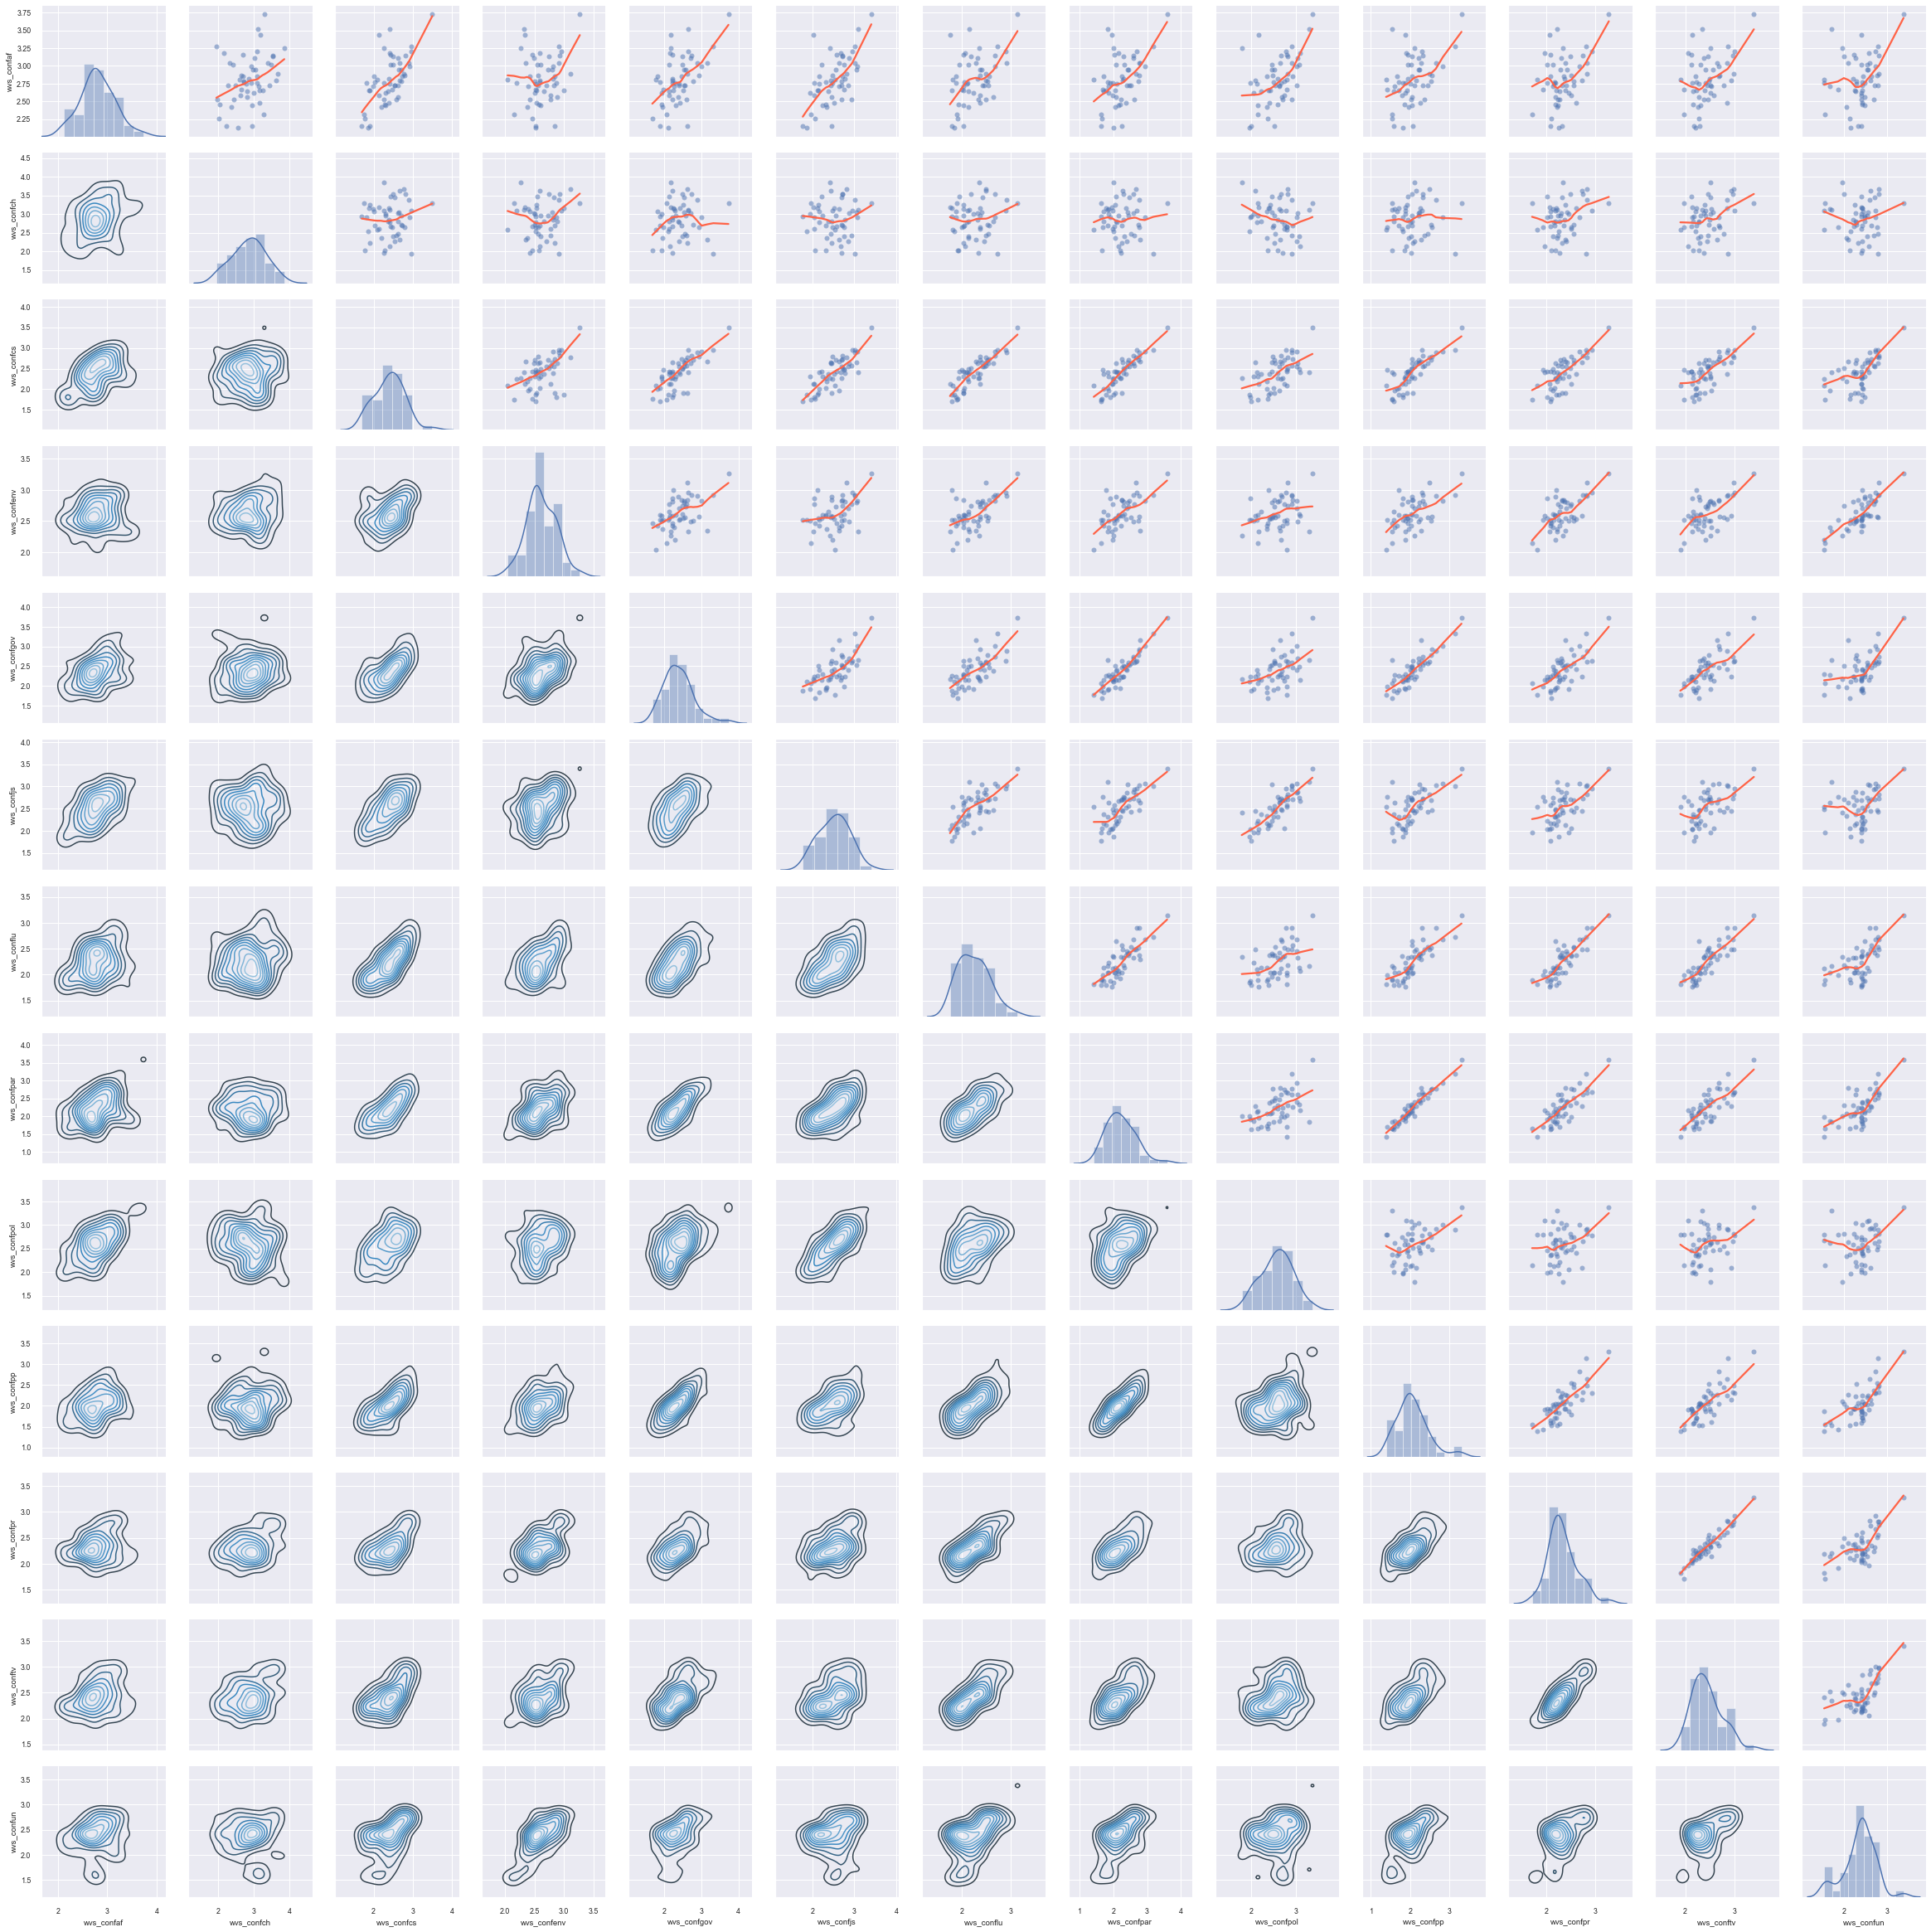

In [66]:
grid = sns.PairGrid(wvs_subset)
grid = grid.map_diag(sns.distplot)
grid = grid.map_lower(sns.kdeplot, cmap="Blues_d")
grid = grid.map_upper(sns.regplot, lowess=True, scatter_kws={'alpha':.5}, line_kws={'color': 'tomato'})